In [3]:
import sys
import datetime
import math
from typing import List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
pd.options.mode.chained_assignment = None  # default='warn'

# import ipdb; ipdb.set_trace()


In [4]:
pd.set_option('display.max_rows', 100)

In [5]:
df = pd.read_csv("data/steve-mar-2021.csv", sep=';', index_col=0, dtype=object)

In [6]:
df = df.sort_values(by='Time', ascending=True)

In [7]:
df = df.iloc[1:,:]
df

,Aircon1,Consumption,Export,Hotplate,Hotwater,Import,Lights1,Lights2,Net,Oven,Power1,Power2,Power3,Production
Time,,,,,,,,,,,,,,
2021-03-01 00:01:00,11.50,157.19,0,0.03,0.02,158.48,0.69,33.62,158.48,0.01,59.94,10.05,41.36,0.30
2021-03-01 00:02:00,11.50,158.31,0,0.03,0.03,159.45,0.71,33.67,159.45,0.04,60.10,11.17,41.11,0.24
2021-03-01 00:03:00,11.56,157.94,0,0.04,0.04,159.79,0.68,33.89,159.79,0.03,60.55,10.11,41.08,0.22
2021-03-01 00:04:00,11.77,158.29,0,0.03,0.05,158.46,0.72,34.05,158.46,0.02,60.79,9.63,41.26,0.24
2021-03-01 00:05:00,11.65,158.83,0,0.04,0.08,161.16,0.83,34.04,161.16,0.06,60.27,10.70,41.20,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 23:55:00,11.07,242.69,0,0.05,0.11,245.58,0.50,89.04,245.58,0.04,57.12,74.29,10.52,0.39
2021-03-31 23:56:00,11.21,271.17,0,0.05,0.12,268.83,0.50,89.01,268.83,0.05,57.31,102.35,10.63,0.38
2021-03-31 23:57:00,11.06,243.28,0,0.05,0.05,244.47,0.51,88.85,244.47,0.04,57.19,75.05,10.54,0.40


In [8]:
powerpoints_1=df.loc[:, "Power1"]
powerpoints_1


Time
2021-03-01 00:01:00    59.94
2021-03-01 00:02:00    60.10
2021-03-01 00:03:00    60.55
2021-03-01 00:04:00    60.79
2021-03-01 00:05:00    60.27
                       ...  
2021-03-31 23:55:00    57.12
2021-03-31 23:56:00    57.31
2021-03-31 23:57:00    57.19
2021-03-31 23:58:00    57.59
2021-03-31 23:59:00    58.02
Name: Power1, Length: 44639, dtype: object

In [9]:
def filter_function(x):
    if type(x) == str:
        return 0
    else:
        return int(round(float(x),0))
    

In [10]:
# Removes invalid data and converts everything to whole number-rounded ints
def process_row(series: pd.Series) -> pd.Series:
#     series = pd.Series([int(round(float(row),0)) for row in series.tolist()])
#     series = series.replace(r'\'-?\w', '0', regex=True)
    series1 = pd.Series([0 if str(row).startswith("'") else row for row in series])
#     [print(row) for row in series if str(row).startswith("'")]

    

    
    
#     m = series.apply(lambda x: x[0].startswith("'"))
#     print(series[m])
#     [print(i) for i in series[m]]
    series1 = series1.apply(lambda row: int(round(float(row),0)))
    series1.index = series.index
#     series = series.apply(filter_function)
#     for index, row in series.iteritems():
#         if type(row) is str: 
#             if (row[0] == "'"):
#                 try:
#                     # if this throws an IndexError, the row is invalid
#                     second_digit = row[2]

#                     # remove ' 
#                     series[index] = row[1:]            
#                 except IndexError:
#                     # delete invalid row
#                     del(series[index])
#                     continue

        # convert to ints rounded to nearest whole number
#         series[index] = int(round(float(row),0))
    return series1

In [11]:
powerpoints_1 = process_row(powerpoints_1)
powerpoints_1

Time
2021-03-01 00:01:00    60
2021-03-01 00:02:00    60
2021-03-01 00:03:00    61
2021-03-01 00:04:00    61
2021-03-01 00:05:00    60
                       ..
2021-03-31 23:55:00    57
2021-03-31 23:56:00    57
2021-03-31 23:57:00    57
2021-03-31 23:58:00    58
2021-03-31 23:59:00    58
Length: 44639, dtype: int64

In [12]:
# Returns a tuple of shape (closest_index, closest_value),
# which contains the closest value to the given value in the given array
def get_nearest(arr: List[int], value: int) -> Tuple[int, int]:
    closest = sys.maxsize
    closest_index = sys.maxsize
    for index, i in enumerate(arr):
        if (abs(value-i) < abs(value-closest)):
            closest = i
            closest_index = index
    
    return closest_index, closest

In [13]:
# Returns an ordered series where the indexes are power values and the first values are the frequencies.
# The first element in the series is the most frequent 
def get_frequencies(freqs: pd.Series, series: pd.Series) -> pd.Series:
#     freqs = cleaned_data.value_counts()
    new_values = []
    new_freqs = []
    i = 1
    j = 0

    # initialise lists to contain first item in the value_counts()
    new_values.append(freqs.iloc[0:0+1].index.values[0])
    new_freqs.append(freqs[freqs.iloc[0:0+1].index.values[0]])

    for value, freq in freqs.iteritems():
        # last item so checking 'next' item will throw IndexError
        if (value == series.value_counts().iloc[-1:].index.values[0]):
            i+=1
            j+=1
            continue

        current_value = freqs.iloc[j:j+1].index.values[0]
        compared_index, compared_value = get_nearest(new_values, current_value)

        # basically the same
        if (abs(current_value - compared_value) < 8 ):
            new_values[compared_index] = (current_value + compared_value) / 2
            new_freqs[compared_index] = freqs[current_value] + new_freqs[compared_index]

        # not the same so insert new entry 
        else:
            new_values.append(current_value)
            new_freqs.append(freqs[current_value])
            i+=1
        j+=1    


    return pd.Series(new_freqs, index=new_values).sort_values(ascending=False)

        
        
        
        
        

In [14]:
freqs = powerpoints_1.value_counts()

In [15]:
first_freqs_count = get_frequencies(freqs, powerpoints_1)

In [16]:
# Calling this a second time (with the result of the first call passed in) groups the frequencies more tightly
second_freqs_count = get_frequencies(first_freqs_count, powerpoints_1)

In [17]:
second_freqs_count

35.832072      32980
66.114847       9673
6.152771        6201
109.151367      3284
94.519531       2458
               ...  
1844.000000        1
2531.000000        1
2674.000000        1
1874.000000        1
3468.000000        1
Length: 188, dtype: int64

In [18]:
# Gets the two most frequent power readings of the data.
# From this, we can determine the cycling power signals of the refrigerator.
def get_modes(data: pd.Series) -> Tuple[int, int]:
    
    # First mode
    value_counts = data.value_counts()
    ser = value_counts.index
    mode = ser[0]
    count = 0
    for i in ser:
        if (abs(i-mode) < 10):
            count += 1
        else:
            break


    val_total = 0
    freq_total = 0
    index = 0
    while (index < count):
        val_total += value_counts.iloc[index] * ser[index]
        freq_total += value_counts.iloc[index]
        index += 1
    mode = int(round((val_total / freq_total), 2))

    
    # Second mode
    i = 0
    for index, freq in value_counts.iteritems():
        if (not (abs(ser[i] - mode) < 10)):
            second_mode = ser[i]
            break
        i+=1

    return mode, second_mode
        
    
    

In [19]:
get_modes(powerpoints_1)

(59, 14)

In [20]:
# Return True if the peak value (less the peak start value) is within the range specified (less the peak start value)
def isInRange(peak_value: int, trough_value: int, min_power: int, max_power: int) -> bool:
    if ((peak_value - trough_value >= min_power) and
        (peak_value - trough_value <= max_power)):
        return True
    return False

In [21]:
# Returns a series of tuples of shape: (peak_start_time, peak_max_value, peak_duration),
# where each peak is within the range specified, finishes within the specified duration, and 
# is off for at least off_requirement minutes after the peak
def get_peaks(data: pd.Series, min_power: int, max_power: int, min_required_duration: int = 0, max_required_duration: int = sys.maxsize, off_requirement: int = 0) -> List[Tuple[str, int, int]]:
    i = 5
    peaks = []
    
    while i < len(data):
#         if (i == 3916):
#             import ipdb; ipdb.set_trace()

        peak_duration = 2 # +1 for the initial turning on, +1 for turning off
        try:
            curr_idx = i
            prev_idx = i-1
            next_idx = i+1
            climb_start_idx = 0
            peak_idx = 0
            if (data.iloc[curr_idx] - data.iloc[prev_idx] > 50): # could be the start of a peak
                climb_start_idx = prev_idx # mark start of climb...
                peak_idx = curr_idx
                while(True):
                    curr_off_duration = off_requirement
                    if (data.iloc[next_idx] - data.iloc[curr_idx] > 10): # still rising... not at peak yet
                        curr_idx+=1
                        prev_idx+=1
                        next_idx+=1
                        if (data.iloc[curr_idx] > data.iloc[peak_idx]):
                            peak_idx=curr_idx
                        peak_duration+=1
                    elif (abs(data.iloc[next_idx] - data.iloc[curr_idx]) < 10): # not rising but still at the same peak
                        curr_idx+=1
                        prev_idx+=1
                        next_idx+=1
                        peak_duration+=1
                    elif (data.iloc[next_idx] > data.iloc[climb_start_idx] + 150): # not at (close enough to) being a trough yet
                        curr_idx+=1
                        prev_idx+=1
                        next_idx+=1
                        peak_duration+=1
                    else: # at a trough, so append climb_start which is the initial peak
                        if (peak_duration <= max_required_duration and 
                            isInRange(data.iloc[peak_idx], data.iloc[climb_start_idx], min_power, max_power)):
                            satisfied_off_requirement = True
                            while (curr_off_duration > 0):
                                if (data.iloc[next_idx+1] > data.iloc[next_idx] + 100): # hasn't been a trough for long enough
                                    satisfied_off_requirement = False
                                    break
                                curr_off_duration -= 1
                                curr_idx+=1
                                prev_idx+=1
                                next_idx+=1
                            if (not satisfied_off_requirement):
                                curr_idx = next_idx
                                prev_idx = curr_idx-1
                                next_idx+=1
                                continue
                            if (not peak_duration < min_required_duration):
                                peaks.append((data.index[climb_start_idx], data.iloc[peak_idx] - data.iloc[climb_start_idx], peak_duration))
                        break
            i = next_idx
        except IndexError:
            i = next_idx
    
    return peaks

In [22]:
food_prep_peaks = get_peaks(powerpoints_1, 700, 2200, 0, 10, 0)
print(len(food_prep_peaks))
pp.pprint(food_prep_peaks)


243
[('2021-03-01 06:26:00', 847, 2),
 ('2021-03-01 07:25:00', 1915, 8),
 ('2021-03-01 07:33:00', 1787, 3),
 ('2021-03-01 07:37:00', 1817, 4),
 ('2021-03-01 10:52:00', 742, 6),
 ('2021-03-01 13:19:00', 1716, 8),
 ('2021-03-01 14:22:00', 1144, 7),
 ('2021-03-01 14:40:00', 2054, 4),
 ('2021-03-01 18:56:00', 744, 3),
 ('2021-03-01 19:46:00', 1489, 3),
 ('2021-03-02 06:09:00', 866, 2),
 ('2021-03-02 06:55:00', 1414, 5),
 ('2021-03-02 17:00:00', 2023, 5),
 ('2021-03-02 18:01:00', 748, 5),
 ('2021-03-02 18:36:00', 908, 2),
 ('2021-03-02 20:03:00', 1971, 5),
 ('2021-03-02 20:48:00', 1991, 4),
 ('2021-03-02 21:45:00', 2147, 4),
 ('2021-03-03 05:38:00', 929, 2),
 ('2021-03-03 06:48:00', 1395, 5),
 ('2021-03-03 16:15:00', 1973, 4),
 ('2021-03-03 17:31:00', 796, 2),
 ('2021-03-03 21:33:00', 2180, 6),
 ('2021-03-03 21:50:00', 2101, 4),
 ('2021-03-04 05:31:00', 934, 2),
 ('2021-03-04 06:42:00', 1408, 5),
 ('2021-03-04 15:05:00', 1829, 2),
 ('2021-03-04 15:09:00', 1004, 2),
 ('2021-03-04 15:21:00', 

In [23]:
hfs01a_microwave_peaks = get_peaks(powerpoints_1, 600, 1200, 0, 10, 0)
print(len(hfs01a_microwave_peaks))
pp.pprint(hfs01a_microwave_peaks)

123
[('2021-03-01 06:26:00', 847, 2),
 ('2021-03-01 10:52:00', 742, 6),
 ('2021-03-01 14:22:00', 1144, 7),
 ('2021-03-01 18:56:00', 744, 3),
 ('2021-03-02 06:09:00', 866, 2),
 ('2021-03-02 18:01:00', 748, 5),
 ('2021-03-02 18:36:00', 908, 2),
 ('2021-03-03 05:38:00', 929, 2),
 ('2021-03-03 17:31:00', 796, 2),
 ('2021-03-04 05:31:00', 934, 2),
 ('2021-03-04 15:09:00', 1004, 2),
 ('2021-03-04 17:56:00', 734, 3),
 ('2021-03-04 18:28:00', 737, 5),
 ('2021-03-04 19:25:00', 924, 2),
 ('2021-03-05 06:04:00', 784, 2),
 ('2021-03-05 17:55:00', 627, 5),
 ('2021-03-06 05:57:00', 930, 2),
 ('2021-03-06 11:11:00', 678, 3),
 ('2021-03-07 05:57:00', 735, 3),
 ('2021-03-07 18:01:00', 776, 2),
 ('2021-03-07 18:20:00', 785, 3),
 ('2021-03-07 18:32:00', 731, 3),
 ('2021-03-08 07:04:00', 898, 2),
 ('2021-03-08 09:37:00', 878, 4),
 ('2021-03-08 10:13:00', 772, 4),
 ('2021-03-08 11:07:00', 641, 2),
 ('2021-03-08 11:41:00', 800, 4),
 ('2021-03-08 14:33:00', 927, 2),
 ('2021-03-08 18:56:00', 901, 2),
 ('2021-

In [24]:
# Stovetop peaks
stove=df.loc[:, "Oven"]
stove = process_row(stove)
stove

Time
2021-03-01 00:01:00    0
2021-03-01 00:02:00    0
2021-03-01 00:03:00    0
2021-03-01 00:04:00    0
2021-03-01 00:05:00    0
                      ..
2021-03-31 23:55:00    0
2021-03-31 23:56:00    0
2021-03-31 23:57:00    0
2021-03-31 23:58:00    0
2021-03-31 23:59:00    0
Length: 44639, dtype: int64

In [25]:
hfs01a_stove_peaks = get_peaks(stove, 500, 5000, 0, 120, 60)
print(len(hfs01a_stove_peaks))
pp.pprint(hfs01a_stove_peaks)

26
[('2021-03-01 18:08:00', 2121, 32),
 ('2021-03-03 16:55:00', 2286, 79),
 ('2021-03-06 10:14:00', 2348, 17),
 ('2021-03-06 13:42:00', 2312, 22),
 ('2021-03-07 17:49:00', 2331, 32),
 ('2021-03-09 17:34:00', 2254, 22),
 ('2021-03-10 19:04:00', 2268, 15),
 ('2021-03-11 17:26:00', 2273, 35),
 ('2021-03-12 18:04:00', 2181, 16),
 ('2021-03-15 13:46:00', 2240, 12),
 ('2021-03-17 17:11:00', 2236, 43),
 ('2021-03-18 17:56:00', 2200, 51),
 ('2021-03-20 15:47:00', 2417, 24),
 ('2021-03-20 18:02:00', 2177, 25),
 ('2021-03-22 12:43:00', 2216, 17),
 ('2021-03-22 18:18:00', 2194, 23),
 ('2021-03-24 18:03:00', 2241, 48),
 ('2021-03-25 17:55:00', 2259, 39),
 ('2021-03-26 16:41:00', 2339, 67),
 ('2021-03-27 17:29:00', 2144, 23),
 ('2021-03-28 11:04:00', 2363, 11),
 ('2021-03-29 17:47:00', 2139, 18),
 ('2021-03-30 10:34:00', 2480, 43),
 ('2021-03-30 17:34:00', 2244, 23),
 ('2021-03-30 20:36:00', 2041, 3),
 ('2021-03-31 17:04:00', 2322, 64)]


In [26]:
lights=df.loc[:, "Lights2"]

In [27]:
lights = process_row(lights)

In [28]:
get_modes(lights)

(0, 19)

In [29]:
# Returns True if the value is between the start and end times
def timeInRange(value: str, start: str, end: str, days_overlap: bool) -> bool:
    midnight_mins = 1440
    
    # get all strings into int's representing total minutes
    value_mins = (int(value[0:2]) * 60) + int(value[3:5])
    start_mins = (int(start[0:2]) * 60) + int(start[3:5])
    end_mins = (int(end[0:2]) * 60) + int(end[3:5])
     
    # if the end time is in the early hours of the next day, alter the value time and end time by adding 24hours  
    if (days_overlap):
        end_mins += 24 * 60
        if not (midnight_mins - value_mins < midnight_mins - start_mins):
            value_mins += (24 * 60)
    
    if (value_mins <= end_mins and value_mins >= start_mins):
        return True
    else:
        return False
    
    
    

In [30]:
# Returns the average time in the given data as a formatted string
def get_average_wake_or_sleep(data: List[Tuple[str, str, int]], overnight_cases: bool = False) -> str:
    total_mins = 0
    for row in data:
        row_mins = (int(row[0][11:13]) * 60) + int(row[0][14:16])
        
        if (overnight_cases and row_mins <= 120):
            row_mins += (24 * 60)
        total_mins += row_mins
    
    hours = (total_mins / (len(data) * 60)) % 24
    hours = int(math.floor(hours))
    mins = total_mins % 60
     
    dt = datetime.datetime(2000, 1, 1, hours, mins, 0)
    
    return dt.strftime("%X")
        
        
        
    

In [31]:
# Returns the most common sleep time and wake time (i.e. circadian rythm)
# TODO: Ignore weekends for a more accurate result
def get_circadian_rythm(data: pd.Series) -> Tuple[str, str]:
    i = 0
    res = []
    on_cases = []
    off_cases = []
    resting_power = get_modes(data)[0]
    while i < len(data):
        try:
            on_duration = 0
            off_duration = 0
            while (data.iloc[i] > resting_power): # lights are on
                on_duration += 1
                i+=1
            
            if on_duration > 120 and timeInRange(data.index[i][11:], '19:00:00', '02:00:00', True): # lights have been on for more than 100 minutes
                off_cases.append((data.index[i], 'turning off', on_duration))

            while (data.iloc[i] <= resting_power): # lights are off
                off_duration += 1
                i+=1
                
            if off_duration > 120 and timeInRange(data.index[i][11:], '03:00:00', '10:00:00', False): # lights have been off for more than 100 minutes
                on_cases.append((data.index[i], 'turning on', off_duration))

            i+=1
        
        except IndexError:
            i+=1
            
    average_wake = get_average_wake_or_sleep(on_cases)
    average_sleep = get_average_wake_or_sleep(off_cases, True)
    
    return (average_wake, average_sleep)

In [172]:
# Returns the most common left the house and got home from work (i.e. work schedule)
# TODO: Ignore weekends for a more accurate result
def get_work_schedule(data: pd.Series) -> Tuple[str, str]:
    i = 0
    res = []
    on_cases = []
    off_cases = []
    resting_power = get_modes(data)[0]
    while i < len(data):
        try:
            on_duration = 0
            off_duration = 0
            while (data.iloc[i] > resting_power): # lights are on
                on_duration += 1
                i+=1
            
            if on_duration > 120 and timeInRange(data.index[i][11:], '05:00:00', '10:00:00', False): # lights have been on for more than 100 minutes
                off_cases.append((data.index[i], 'turning off', on_duration))

            while (data.iloc[i] <= resting_power): # lights are off
                off_duration += 1
                i+=1
                
            if off_duration > 120 and timeInRange(data.index[i][11:], '14:00:00', '19:00:00', False): # lights have been off for more than 100 minutes
                on_cases.append((data.index[i], 'turning on', off_duration))

            i+=1
        
        except IndexError:
            i+=1
            
    average_home = get_average_wake_or_sleep(on_cases)
    average_leave = get_average_wake_or_sleep(off_cases, True)
    
    return (average_leave, average_home)

In [32]:
circadian_rythm = get_circadian_rythm(lights)
circadian_rythm

('05:41:00', '22:52:00')

In [33]:
aircon = df.loc[:, "Aircon1"]
aircon = process_row(aircon)

    

In [34]:
aircon_peaks = get_peaks(aircon, 100, 10000, 10, 1000, 60)
print(len(aircon_peaks))
pp.pprint(aircon_peaks)

13
[('2021-03-01 14:41:00', 1795, 203),
 ('2021-03-02 15:56:00', 2554, 157),
 ('2021-03-07 11:42:00', 1026, 273),
 ('2021-03-08 11:14:00', 1649, 226),
 ('2021-03-09 12:51:00', 1417, 338),
 ('2021-03-14 11:18:00', 2549, 431),
 ('2021-03-20 17:47:00', 1624, 133),
 ('2021-03-21 12:07:00', 892, 194),
 ('2021-03-23 05:59:00', 1008, 31),
 ('2021-03-24 16:30:00', 2466, 69),
 ('2021-03-26 16:35:00', 867, 110),
 ('2021-03-27 17:05:00', 2477, 108),
 ('2021-03-29 17:25:00', 1600, 65)]


In [35]:
# Returns the energy usage (Wh) of each peak
def get_watt_hours(peaks: List[Tuple[str,int,int]], data: pd.Series) -> List[Tuple[str,int]]:
    watt_hours = []
    for peak in peaks:
        watt_hour = 0
        for _ in range(peak[2]):
            watt_hour += data.loc[peak[0]]
        watt_hours.append((peak[0], watt_hour))

    return watt_hours

In [36]:
watt_hours = get_watt_hours(aircon_peaks, aircon)
watt_hours

[('2021-03-01 14:41:00', 5075),
 ('2021-03-02 15:56:00', 1884),
 ('2021-03-07 11:42:00', 3003),
 ('2021-03-08 11:14:00', 3390),
 ('2021-03-09 12:51:00', 19266),
 ('2021-03-14 11:18:00', 4741),
 ('2021-03-20 17:47:00', 5453),
 ('2021-03-21 12:07:00', 2134),
 ('2021-03-23 05:59:00', 341),
 ('2021-03-24 16:30:00', 759),
 ('2021-03-26 16:35:00', 3300),
 ('2021-03-27 17:05:00', 1296),
 ('2021-03-29 17:25:00', 2535)]

In [37]:
def get_daily_usage(arr: List[Tuple[str,int]]) -> pd.Series:
    df = pd.DataFrame(arr).set_index(0)[1]
    df.index.name = 'Time'
    df.name = 'Processed Watt Hours'
    df.index = pd.to_datetime(df.index)
    df = df.resample('D').sum()
    
    start_date = int(df.index[0].strftime("%d"))
    i = start_date - 1
    while (i > 0):
        datetime = pd.Timestamp(int(df.index[0].strftime("%Y")), int(df.index[0].strftime("%m")), i, 0, 0, 0)
        df.loc[datetime] = 0
        df.sort_index(inplace=True) 
        i-=1
    
    end_date = int(df.index[-1].strftime("%d"))
    i = end_date + 1
    from calendar import monthrange
    days_in_month = monthrange(int(df.index[-1].strftime("%Y")), int(df.index[-1].strftime("%m")))[1]
    while (i <= days_in_month):
        datetime = pd.Timestamp(int(df.index[-1].strftime("%Y")), int(df.index[-1].strftime("%m")), i, 0, 0, 0)
        df.loc[datetime] = 0
        df.sort_index(inplace=True) 
        i+=1
        
    return df

In [38]:
usage_series = get_daily_usage(watt_hours)
usage_series

Time
2021-03-01     5075
2021-03-02     1884
2021-03-03        0
2021-03-04        0
2021-03-05        0
2021-03-06        0
2021-03-07     3003
2021-03-08     3390
2021-03-09    19266
2021-03-10        0
2021-03-11        0
2021-03-12        0
2021-03-13        0
2021-03-14     4741
2021-03-15        0
2021-03-16        0
2021-03-17        0
2021-03-18        0
2021-03-19        0
2021-03-20     5453
2021-03-21     2134
2021-03-22        0
2021-03-23      341
2021-03-24      759
2021-03-25        0
2021-03-26     3300
2021-03-27     1296
2021-03-28        0
2021-03-29     2535
2021-03-30        0
2021-03-31        0
Freq: D, Name: Processed Watt Hours, dtype: int64

In [39]:
def load_bom_data(filename: str, isHigh: bool) -> List[int]:
    data = pd.read_csv(filename, sep=',', index_col=0, dtype=object)
    data_col = data.iloc[:, 1] if isHigh else data.iloc[:, 0]
    temps = [int(float(data_col.iloc[i])) for i in range(len(data_col))]
    
    return temps

In [40]:
mar_2021 = load_bom_data("data/extra/bom-mar-2021.csv", True)

dec_2020 = load_bom_data("data/extra/bom-dec-2020.csv", True)
jan_2021 = load_bom_data("data/extra/bom-jan-2021.csv", True)
feb_2021 = load_bom_data("data/extra/bom-feb-2021.csv", True)
max_temps_summer = dec_2020 + jan_2021 + feb_2021

jun_2020 = load_bom_data("data/extra/bom-jun-2020.csv", False)
jul_2020 = load_bom_data("data/extra/bom-jul-2020.csv", False)
aug_2020 = load_bom_data("data/extra/bom-aug-2020.csv", False)
min_temps_winter = jun_2020 + jul_2020 + aug_2020

In [41]:
df = pd.read_csv("data/uq49_01-06-2020--31-08-2020.csv", sep=';', index_col=0, dtype=object)
df = df.sort_values(by='Time', ascending=True)
df = df.iloc[1:,:]

df1 = pd.read_csv("data/uq49_01-12-2020--28-02-2021.csv", sep=';', index_col=0, dtype=object)
df1 = df1.sort_values(by='Time', ascending=True)
df1 = df1.iloc[1:,:]

df2 = pd.read_csv("data/uq49_01-12-2020--31-12-2020.csv", sep=';', index_col=0, dtype=object)
df2 = df2.sort_values(by='Time', ascending=True)
df2 = df2.iloc[1:,:]

In [42]:
powerpoints_uq49 = df2.loc[:, "Powerpoints1"]
powerpoints_uq49 = process_row(powerpoints_uq49)

hob_uq49 = df2.loc[:, "Hob"]
hob_uq49 = process_row(hob_uq49)

microwave_peaks_uq49 = get_peaks(powerpoints_uq49, 600, 1200, 0, 10, 0)
print(len(microwave_peaks_uq49))
pp.pprint(microwave_peaks_uq49)

stove_peaks_uq49 = get_peaks(hob_uq49, 500, 5000, 0, 120, 60)
print(len(stove_peaks_uq49))
pp.pprint(stove_peaks_uq49)

6
[('2020-12-03 10:55:00', 621, 2),
 ('2020-12-06 16:23:00', 1184, 3),
 ('2020-12-09 08:38:00', 621, 2),
 ('2020-12-11 07:30:00', 616, 2),
 ('2020-12-15 13:03:00', 789, 3),
 ('2020-12-22 11:17:00', 624, 2)]
27
[('2020-12-01 17:34:00', 1304, 12),
 ('2020-12-02 10:52:00', 1237, 7),
 ('2020-12-02 18:40:00', 2667, 38),
 ('2020-12-03 18:43:00', 2488, 32),
 ('2020-12-04 18:41:00', 1286, 14),
 ('2020-12-06 11:20:00', 1284, 4),
 ('2020-12-07 16:01:00', 970, 17),
 ('2020-12-07 18:27:00', 1307, 15),
 ('2020-12-08 07:23:00', 3295, 16),
 ('2020-12-08 19:45:00', 2625, 22),
 ('2020-12-09 10:41:00', 2921, 23),
 ('2020-12-09 19:25:00', 3407, 16),
 ('2020-12-10 13:25:00', 1323, 5),
 ('2020-12-10 18:12:00', 2268, 4),
 ('2020-12-10 23:01:00', 2506, 7),
 ('2020-12-11 14:45:00', 1148, 12),
 ('2020-12-11 21:17:00', 1318, 20),
 ('2020-12-12 16:17:00', 1296, 4),
 ('2020-12-14 15:44:00', 1333, 8),
 ('2020-12-14 19:09:00', 2658, 56),
 ('2020-12-15 09:32:00', 2511, 16),
 ('2020-12-15 21:32:00', 1335, 14),
 ('202

In [43]:
aircon_winter = df.loc[:, "Aircon1"]
aircon_winter = process_row(aircon_winter)

aircon_summer = df1.loc[:, "Aircon1"]
aircon_summer = process_row(aircon_summer)


In [44]:
aircon_winter

Time
2020-06-01 00:01:00    1
2020-06-01 00:02:00    1
2020-06-01 00:03:00    2
2020-06-01 00:04:00    1
2020-06-01 00:05:00    1
                      ..
2020-08-31 23:55:00    1
2020-08-31 23:56:00    1
2020-08-31 23:57:00    1
2020-08-31 23:58:00    1
2020-08-31 23:59:00    0
Length: 132479, dtype: int64

In [45]:
aircon_summer

Time
2020-12-01 00:01:00    1
2020-12-01 00:02:00    1
2020-12-01 00:03:00    1
2020-12-01 00:04:00    1
2020-12-01 00:05:00    1
                      ..
2021-02-28 23:55:00    0
2021-02-28 23:56:00    0
2021-02-28 23:57:00    0
2021-02-28 23:58:00    0
2021-02-28 23:59:00    0
Length: 129599, dtype: int64

In [46]:
aircon_peaks_winter = get_peaks(aircon_winter, 100, 10000, 0, 1000, 60)
aircon_peaks_winter

[('2020-06-02 17:40:00', 1910, 21),
 ('2020-06-03 17:16:00', 1931, 86),
 ('2020-06-04 04:59:00', 1901, 46),
 ('2020-06-04 14:22:00', 1947, 24),
 ('2020-06-05 17:06:00', 1891, 17),
 ('2020-06-06 21:34:00', 1896, 43),
 ('2020-06-07 17:59:00', 1888, 15),
 ('2020-06-08 08:07:00', 1921, 26),
 ('2020-06-09 16:44:00', 1950, 29),
 ('2020-06-12 04:29:00', 1910, 20),
 ('2020-06-19 20:33:00', 1911, 17),
 ('2020-06-20 08:15:00', 1934, 30),
 ('2020-06-20 18:18:00', 1933, 43),
 ('2020-06-21 08:44:00', 1932, 18),
 ('2020-06-21 17:22:00', 1941, 68),
 ('2020-06-22 08:23:00', 1943, 11),
 ('2020-06-22 21:22:00', 1937, 38),
 ('2020-06-23 08:03:00', 1945, 37),
 ('2020-06-23 11:52:00', 107, 2),
 ('2020-06-23 14:18:00', 1415, 4),
 ('2020-06-23 18:01:00', 1906, 15),
 ('2020-06-24 05:50:00', 1907, 93),
 ('2020-06-24 08:53:00', 1916, 9),
 ('2020-06-25 08:43:00', 1948, 42),
 ('2020-06-26 08:32:00', 1966, 54),
 ('2020-06-26 17:44:00', 1931, 21),
 ('2020-06-28 17:13:00', 1925, 96),
 ('2020-06-28 21:15:00', 1948, 3

In [47]:
aircon_peaks_summer = get_peaks(aircon_summer, 100, 10000, 0, 1000, 60)
aircon_peaks_summer

[('2020-12-01 12:26:00', 1698, 189),
 ('2020-12-01 19:50:00', 1512, 49),
 ('2020-12-01 22:21:00', 1503, 45),
 ('2020-12-02 16:35:00', 1614, 139),
 ('2020-12-03 10:50:00', 1638, 66),
 ('2020-12-04 09:56:00', 1656, 35),
 ('2020-12-04 12:59:00', 1731, 86),
 ('2020-12-04 16:02:00', 1652, 35),
 ('2020-12-04 18:37:00', 1515, 24),
 ('2020-12-06 09:17:00', 1615, 23),
 ('2020-12-06 11:08:00', 1748, 103),
 ('2020-12-06 14:12:00', 1687, 130),
 ('2020-12-06 19:19:00', 1639, 69),
 ('2020-12-06 21:46:00', 1556, 27),
 ('2020-12-08 14:30:00', 1639, 105),
 ('2020-12-15 13:51:00', 1568, 66),
 ('2020-12-15 21:34:00', 1446, 44),
 ('2020-12-16 20:59:00', 1465, 40),
 ('2020-12-17 19:01:00', 1529, 24),
 ('2020-12-17 21:15:00', 1504, 50),
 ('2020-12-18 14:14:00', 1650, 92),
 ('2020-12-19 14:55:00', 1658, 184),
 ('2020-12-19 20:35:00', 1490, 46),
 ('2020-12-20 09:33:00', 1646, 85),
 ('2020-12-20 17:02:00', 1578, 110),
 ('2020-12-21 13:08:00', 1652, 136),
 ('2020-12-21 21:08:00', 1500, 108),
 ('2021-01-17 19:18

In [48]:
watt_hours_winter = get_watt_hours(aircon_peaks_winter, aircon_winter)
watt_hours_winter

[('2020-06-02 17:40:00', 21),
 ('2020-06-03 17:16:00', 86),
 ('2020-06-04 04:59:00', 276),
 ('2020-06-04 14:22:00', 24),
 ('2020-06-05 17:06:00', 17),
 ('2020-06-06 21:34:00', 43),
 ('2020-06-07 17:59:00', 15),
 ('2020-06-08 08:07:00', 156),
 ('2020-06-09 16:44:00', 58),
 ('2020-06-12 04:29:00', 20),
 ('2020-06-19 20:33:00', 17),
 ('2020-06-20 08:15:00', 180),
 ('2020-06-20 18:18:00', 258),
 ('2020-06-21 08:44:00', 108),
 ('2020-06-21 17:22:00', 68),
 ('2020-06-22 08:23:00', 77),
 ('2020-06-22 21:22:00', 190),
 ('2020-06-23 08:03:00', 0),
 ('2020-06-23 11:52:00', 10),
 ('2020-06-23 14:18:00', 16),
 ('2020-06-23 18:01:00', 120),
 ('2020-06-24 05:50:00', 558),
 ('2020-06-24 08:53:00', 45),
 ('2020-06-25 08:43:00', 210),
 ('2020-06-26 08:32:00', 270),
 ('2020-06-26 17:44:00', 21),
 ('2020-06-28 17:13:00', 96),
 ('2020-06-28 21:15:00', 39),
 ('2020-06-29 07:30:00', 205),
 ('2020-06-29 17:49:00', 43),
 ('2020-06-30 08:26:00', 340),
 ('2020-07-01 18:02:00', 188),
 ('2020-07-02 04:01:00', 174

In [49]:
watt_hours_summer = get_watt_hours(aircon_peaks_summer, aircon_summer)

In [50]:
usage_series_winter = get_daily_usage(watt_hours_winter)
usage_series_winter

Time
2020-06-01       0
2020-06-02      21
2020-06-03      86
2020-06-04     300
2020-06-05      17
2020-06-06      43
2020-06-07      15
2020-06-08     156
2020-06-09      58
2020-06-10       0
2020-06-11       0
2020-06-12      20
2020-06-13       0
2020-06-14       0
2020-06-15       0
2020-06-16       0
2020-06-17       0
2020-06-18       0
2020-06-19      17
2020-06-20     438
2020-06-21     176
2020-06-22     267
2020-06-23     146
2020-06-24     603
2020-06-25     210
2020-06-26     291
2020-06-27       0
2020-06-28     135
2020-06-29     248
2020-06-30     340
2020-07-01     188
2020-07-02     205
2020-07-03     354
2020-07-04     255
2020-07-05     295
2020-07-06       0
2020-07-07       0
2020-07-08       0
2020-07-09       0
2020-07-10       0
2020-07-11       0
2020-07-12       0
2020-07-13       0
2020-07-14    1398
2020-07-15     301
2020-07-16     130
2020-07-17     521
2020-07-18      40
2020-07-19     360
2020-07-20     234
2020-07-21       0
2020-07-22     128
2020-07

In [51]:
usage_series_summer = get_daily_usage(watt_hours_summer)
usage_series_summer

Time
2020-12-01     328
2020-12-02     139
2020-12-03      66
2020-12-04     180
2020-12-05       0
2020-12-06     352
2020-12-07       0
2020-12-08       0
2020-12-09       0
2020-12-10       0
2020-12-11       0
2020-12-12       0
2020-12-13       0
2020-12-14       0
2020-12-15       0
2020-12-16       0
2020-12-17      74
2020-12-18       0
2020-12-19      46
2020-12-20     195
2020-12-21     108
2020-12-22       0
2020-12-23       0
2020-12-24       0
2020-12-25       0
2020-12-26       0
2020-12-27       0
2020-12-28       0
2020-12-29       0
2020-12-30       0
2020-12-31       0
2021-01-01       0
2021-01-02       0
2021-01-03       0
2021-01-04       0
2021-01-05       0
2021-01-06       0
2021-01-07       0
2021-01-08       0
2021-01-09       0
2021-01-10       0
2021-01-11       0
2021-01-12       0
2021-01-13       0
2021-01-14       0
2021-01-15       0
2021-01-16       0
2021-01-17     342
2021-01-18       0
2021-01-19       0
2021-01-20       0
2021-01-21       0
2021-01

In [52]:
# TODO: Consider using another metric for heat sensitivity
def plot_aircon_trend(usage_series: pd.Series, temps: List[int], s_type: str):
    usage = usage_series.tolist()
    x_ticks = [i for i in range(len(usage)) if i % 4 == 0]
    x_ticklabels = [usage_series.index[i].strftime("%Y/%m/%d") for i in x_ticks]

    n=len(usage)
    position = np.arange(n)
    offset = 0.15
    width = 0.3

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()

    ax.bar(position - offset, temps, width, label = s_type + " Temperature", color='orange')
    ax2.bar(position + offset, usage, width, label = 'Aircon Usage', color='blue')
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    
    min_temp = min(temps)
    max_temp = max(temps)

    ax2.set_ylabel("Power W")
    ax.set_ylabel("Degree's C")
    ax.set_ylim([min_temp-2,max_temp+2])

    ax.set_xlabel("Date")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels, rotation=60)
    
    plt.title(s_type + " Temperature vs. Aircon Usage")
    plt.show()

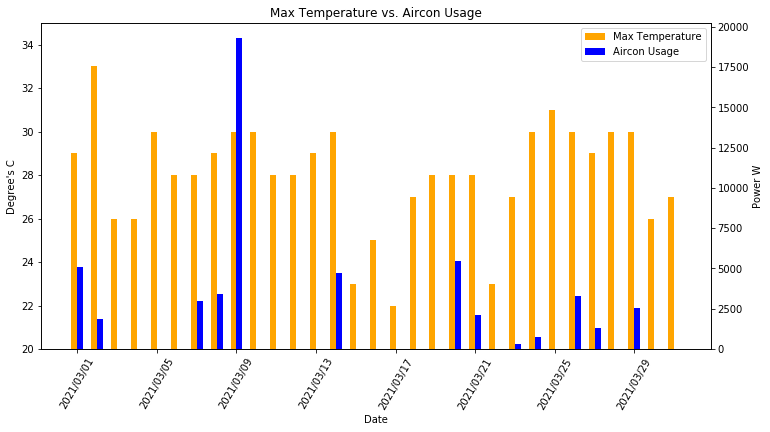

In [53]:
plot_aircon_trend(usage_series, mar_2021, s_type="Max")

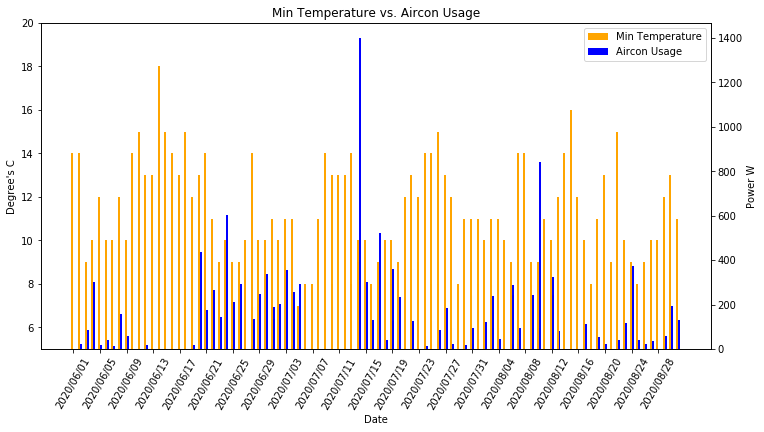

In [54]:
plot_aircon_trend(usage_series_winter, min_temps_winter, s_type="Min")

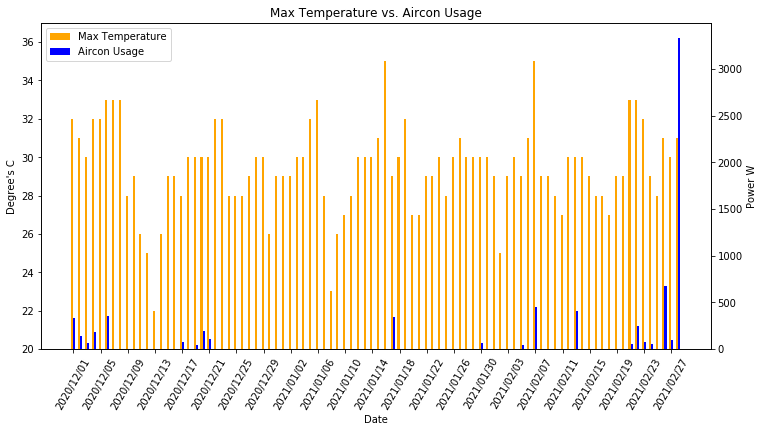

In [55]:
plot_aircon_trend(usage_series_summer, max_temps_summer, s_type="Max")

In [56]:
def get_probabilities(temps: List[int], usage_series: pd.Series):
    usage = usage_series.tolist()
    
    td = pd.DataFrame(temps)
    td = [int(float(td.iloc[i])) for i in range(len(td))]
    td = pd.Series(td)

    n = pd.DataFrame()
    n['temps'] = td
    n['vals'] = usage
    
    num_days = len(temps)
    
    probs = []
    min_temp = min(temps)
    max_temp = max(temps)
    
    # Bayes' Theorem
    for i in range(min_temp, max_temp+1):
        p_a = usage_series.gt(0).sum() / num_days
        p_b = td.eq(i).sum() / num_days
        p_a_or_b = (n['vals'].gt(0) | n['temps'].eq(i)).sum() / num_days
        p_a_and_b = p_a + p_b - p_a_or_b
        if (p_b == 0):
            probs.append(np.nan)
            continue
        p_a_given_b = p_a_and_b / p_b
        probs.append(round(p_a_given_b,2))
    
    return probs
        

In [57]:
get_probabilities(mar_2021, usage_series)

[0.0, 0.0, nan, 0.0, 0.0, 0.33, 0.43, 0.75, 0.63, 0.0, nan, 1.0]

In [58]:
def plot_probability_curve(temps: List[int], usage_series: pd.Series):
        
    min_temp = min(temps)
    max_temp = max(temps)
        
    fig = plt.figure(figsize=(8,6))
        
    probs = get_probabilities(temps, usage_series)
    interpolated = pd.Series(probs).interpolate().values.ravel().tolist()
    
    y = probs
    y = np.array(y)
    x = np.arange(min_temp, max_temp+1, 1)
        
    plt.plot(x, interpolated)
    
    ax = plt.gca()
    ax.set_ylim([0.0,1.0])
    
    plt.xlabel("Temperature (C)")
    plt.ylabel("Probability of Aircon Use")
    plt.title("Probability Curve of Aircon Usage vs Temperature")
    plt.show()
    
    return x, interpolated

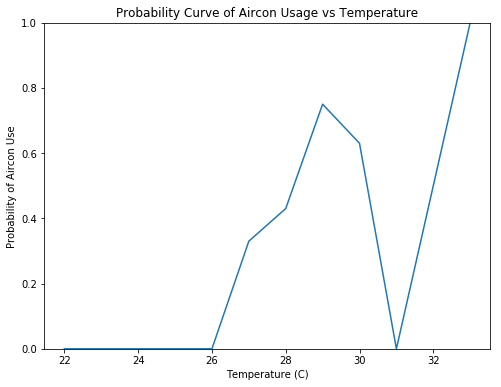

(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.33, 0.43, 0.75, 0.63, 0.0, 0.5, 1.0])

In [59]:
plot_probability_curve(mar_2021, usage_series)

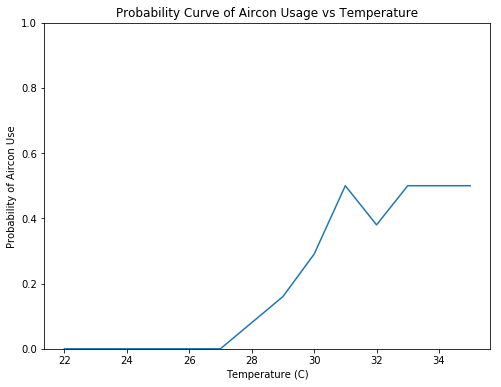

(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08, 0.16, 0.29, 0.5, 0.38, 0.5, 0.5, 0.5])

In [60]:
plot_probability_curve(max_temps_summer, usage_series_summer)

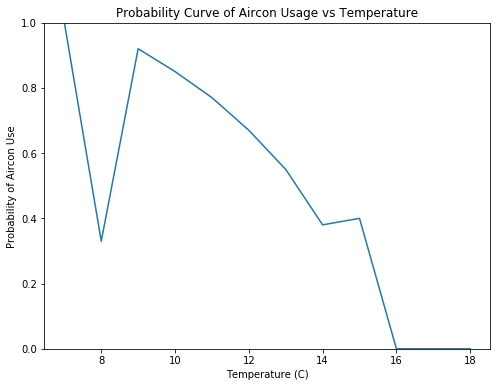

(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
 [1.0, 0.33, 0.92, 0.85, 0.77, 0.67, 0.55, 0.38, 0.4, 0.0, 0.0, 0.0])

In [61]:
plot_probability_curve(min_temps_winter, usage_series_winter)

In [62]:
def plot_probs_combined(min_temps_winter: List[int], usage_series_winter: pd.Series, max_temps_summer: List[int], usage_series_summer: pd.Series):
    winter_probs = get_probabilities(min_temps_winter, usage_series_winter)
    summer_probs = get_probabilities(max_temps_summer, usage_series_summer)
    
    all_temps = np.arange(min(min_temps_winter), max(max_temps_summer)+1, 1)
    all_probs = [0.0] * len(all_temps)
    
    i=0
    while (i < len(winter_probs)):
        all_probs[i] = winter_probs[i]
        i+=1

    j = len(all_probs) - len(summer_probs)
    while (j < len(all_probs)):
        all_probs[j] = summer_probs[j-len(summer_probs)-1]
        j+=1
        
    interpolated = pd.Series(all_probs).interpolate().values.ravel().tolist()
    
    fig = plt.figure(figsize=(8,6))
    plt.plot(all_temps, interpolated)

    ax = plt.gca()
    ax.set_ylim([0.0,1.0])

    plt.xlabel("Temperature (C)")
    plt.ylabel("Probability of Aircon Use")
    plt.title("Probability Curve of Aircon Usage vs Temperature")
    plt.show()
    
    return all_temps, all_probs

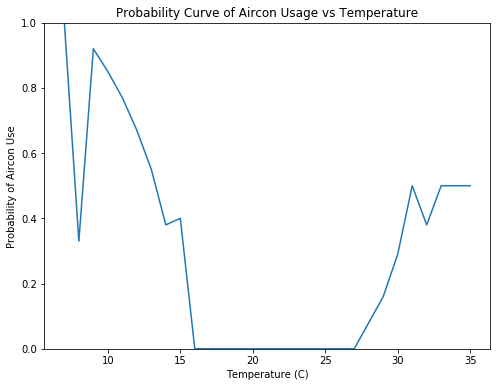

(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
 [1.0,
  0.33,
  0.92,
  0.85,
  0.77,
  0.67,
  0.55,
  0.38,
  0.4,
  0.0,
  nan,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  nan,
  0.0,
  0.0,
  0.0,
  0.08,
  0.16,
  0.29,
  0.5,
  0.38,
  0.5,
  nan,
  0.5])

In [63]:
# TODO: Maybe filter this so that only major aircon usages are plotted.
plot_probs_combined(min_temps_winter, usage_series_winter, max_temps_summer, usage_series_summer)

In [64]:
# Microwave vs Stovetop Visualisation

#  1. Get access to PhiSaver API
#  2. Get average of all households' microwave use AND stovetop use
#  3. ...

In [65]:
from influxdb import InfluxDBClient, DataFrameClient

In [66]:
client2 = InfluxDBClient(host='live2.phisaver.com', database='phisaver', username='reader', password='Rmagine!', port=8086, headers={'Accept': 'application/json'}, gzip=True)
# q = """SELECT * FROM "iotawatt" WHERE "device" = 'hfs01a' AND "time" > '2021-05-31T11:58:20Z' - 12w"""

# client_df = pd.DataFrame(client2.query(q, chunked=True))


In [67]:
power_circuits = { \
                  "uq10": "Powerpoints1",
                  "uq12": "Powerpoints2",
                  "uq23": "Powerpoints1",
                  "uq24": "Powerpoints2",
                  "uq26": "Powerpoints1"
                 }

In [68]:
stove_circuits = { \
                  "uq10": "Oven",
                  "uq12": "Stove",
                  "uq23": "Stove",
                  "uq24": "OvenHob",
                  "uq26": "Stove"
                 }

In [69]:
# Calculate average (or similar) and bounds for microwave and stovetop usage


In [70]:
def get_data_in_period(client, start_date, end_date, device, sensor):
    current_date = start_date
    dataF = pd.DataFrame()
    
    while (current_date < end_date):
        q = """SELECT * FROM "iotawatt" WHERE "device" = {} AND "sensor" = {} AND "time" >= {} AND "time" <= {}""".format(device, sensor, current_date, end_date)
        print(q)
        data = pd.DataFrame(client.query(q, chunked=True))
        dataF = dataF.append(data, ignore_index=True)
        most_recent_time = get_most_recent_time(dataF)
        current_date = most_recent_time
    
    return dataF

In [71]:
def get_most_recent_time(df):
    last_idx = df.index[-1]-1
    last_arr = df[0][last_idx]
    last_time = last_arr[-1].get("time")
    return "'{}'".format(last_time)

In [72]:
# dataframes = []
# for i, home in enumerate(power_circuits):
#     dataframes.append(get_data_in_period(client2, "'2021-03-01T00:00:00Z'", "'2021-03-31T23:59:50Z'", "'{}'".format(home), "'{}'".format(power_circuits[home])))

In [73]:
# stove_dataframes = []
# for i, home in enumerate(stove_circuits):
#     stove_dataframes.append(get_data_in_period(client2, "'2021-03-01T00:00:00Z'", "'2021-03-31T23:59:50Z'", "'{}'".format(home), "'{}'".format(stove_circuits[home])))    

In [74]:
# Now pre-process these df's into the format required for the process() method.

In [159]:
def pre_process(dataframes):
    post_process = []
    if (type(dataframes) != 'list'):
        new_df = []
        new_df.append(dataframes)
        dataframes = new_df
        
    for dataframe in dataframes:
        df = pd.DataFrame()
        for inner_df in dataframe[0]:
            to_append = pd.DataFrame(inner_df)
            to_append = to_append.set_index('time')
            to_append = to_append.loc[:, "Watts"]
#             to_append = to_append[~to_append.index.duplicated()]
            to_append = to_append.to_frame()
    
            # Filter out the time values that are not on the minute for getting 1-min granularity
#             to_append = to_append.groupby(np.arange(len(to_append))//6).mean()
#             to_append = to_append.loc[to_append.index.str.endswith('00Z')]
            df = df.append(to_append)
        print("Processing: ", df)
        
        processing = process_row(df.squeeze())
        # Granularity filter
#         print("PPPP: ", processing)
#         processing_means = processing.groupby(np.arange(len(processing))//6).sum()
#         processing_means.index = processing.index[::6]

        print("Post process: ", processing)
        post_process.append(processing)
        
    for df in post_process:
        df.index = df.index.to_series().apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').strftime('%Y-%m-%d %H:%M:%S'))

    return post_process

In [76]:
# processed = pre_process(dataframes)
# processed

In [77]:
# stove_processed = pre_process(stove_dataframes)
# stove_processed

In [78]:
def microwave_stove_peaks(processed, stove_processed):
    microwave = []
    stove = []
    
    for df in processed:
        microwave_peaks = get_peaks(df, 600, 1200, 0, 10, 0)
        microwave.append(len(microwave_peaks))
        
    for df in stove_processed:
        stove_peaks = get_peaks(df, 500, 5000, 0, 120, 60)
        stove.append(len(stove_peaks))
        
    return microwave, stove

In [81]:
# microwave_peaks, stove_peaks = microwave_stove_peaks(processed, stove_processed)

In [82]:
# print(microwave_peaks)
# print(stove_peaks)

In [83]:
def normalise(x, x_min, x_max):
    return round(2*((x-x_min)/(x_max-x_min))-1,2)

In [84]:
# uq49_microwave_normalised = normalise(len(microwave_peaks_uq49), min(microwave_peaks), max(microwave_peaks))
# uq49_stove_normalised = normalise(len(stove_peaks_uq49), min(stove_peaks), max(stove_peaks))

# print(uq49_microwave_normalised)
# print(uq49_stove_normalised)

In [85]:
# hfs01a_microwave_normalised = normalise(len(hfs01a_microwave_peaks), min(microwave_peaks), max(microwave_peaks))
# hfs01a_stove_normalised = normalise(len(hfs01a_stove_peaks), min(stove_peaks), max(stove_peaks))

# print(hfs01a_microwave_normalised)
# print(hfs01a_stove_normalised)

In [86]:
# import requests
# # data={'microwave': hfs01a_microwave_normalised, 'stovetop': hfs01a_stove_normalised}
# data={'microwave': uq49_microwave_normalised, 'stovetop': uq49_stove_normalised}

# r = requests.post('http://localhost:3001/data', data=data)
# print(r.json())
# print(r.status_code)

In [87]:
# %history -g

In [88]:
light_circuits = { \
                  "uq10": "Lights1",
                  "uq12": "Lights12",
                  "uq23": "Lights1",
                  "uq24": "Lights1",
                  "uq26": "Light",
                  "hfs01a": "Lights2"
                 }

In [89]:
# !!!  Only call this when needing to query DB again  !!!

light_dataframes = []
for i, home in enumerate(light_circuits):
    light_dataframes.append(get_data_in_period(client2, "'2021-03-01T00:00:00Z'", "'2021-03-31T23:59:50Z'", "'{}'".format(home), "'{}'".format(light_circuits[home])))

SELECT * FROM "iotawatt" WHERE "device" = 'uq10' AND "sensor" = 'Lights1' AND "time" >= '2021-03-01T00:00:00Z' AND "time" <= '2021-03-31T23:59:50Z'
SELECT * FROM "iotawatt" WHERE "device" = 'uq10' AND "sensor" = 'Lights1' AND "time" >= '2021-03-31T02:29:10Z' AND "time" <= '2021-03-31T23:59:50Z'
SELECT * FROM "iotawatt" WHERE "device" = 'uq12' AND "sensor" = 'Lights12' AND "time" >= '2021-03-01T00:00:00Z' AND "time" <= '2021-03-31T23:59:50Z'
SELECT * FROM "iotawatt" WHERE "device" = 'uq12' AND "sensor" = 'Lights12' AND "time" >= '2021-03-31T02:13:10Z' AND "time" <= '2021-03-31T23:59:50Z'
SELECT * FROM "iotawatt" WHERE "device" = 'uq23' AND "sensor" = 'Lights1' AND "time" >= '2021-03-01T00:00:00Z' AND "time" <= '2021-03-31T23:59:50Z'
SELECT * FROM "iotawatt" WHERE "device" = 'uq23' AND "sensor" = 'Lights1' AND "time" >= '2021-03-31T02:17:40Z' AND "time" <= '2021-03-31T23:59:50Z'
SELECT * FROM "iotawatt" WHERE "device" = 'uq24' AND "sensor" = 'Lights1' AND "time" >= '2021-03-01T00:00:00Z'

In [154]:
type(light_dataframes)

list

In [90]:
light_processed = pre_process(light_dataframes)
light_processed

Processing:                         Watts
time                        
2021-03-01T00:00:00Z  263.54
2021-03-01T00:00:10Z  264.36
2021-03-01T00:00:20Z  263.86
2021-03-01T00:00:30Z  263.78
2021-03-01T00:00:40Z  263.59
...                      ...
2021-03-31T23:59:10Z   19.92
2021-03-31T23:59:20Z   19.79
2021-03-31T23:59:30Z   19.86
2021-03-31T23:59:40Z   19.86
2021-03-31T23:59:50Z   19.81

[275489 rows x 1 columns]
Post process:  time
2021-03-01T00:00:00Z    264
2021-03-01T00:00:10Z    264
2021-03-01T00:00:20Z    264
2021-03-01T00:00:30Z    264
2021-03-01T00:00:40Z    264
                       ... 
2021-03-31T23:59:10Z     20
2021-03-31T23:59:20Z     20
2021-03-31T23:59:30Z     20
2021-03-31T23:59:40Z     20
2021-03-31T23:59:50Z     20
Length: 275489, dtype: int64
Processing:                        Watts
time                       
2021-03-01T00:00:00Z   0.26
2021-03-01T00:00:10Z   0.23
2021-03-01T00:00:20Z   0.28
2021-03-01T00:00:30Z   0.25
2021-03-01T00:00:40Z   0.23
...              

[time
 2021-03-01 00:00:00    264
 2021-03-01 00:00:10    264
 2021-03-01 00:00:20    264
 2021-03-01 00:00:30    264
 2021-03-01 00:00:40    264
                       ... 
 2021-03-31 23:59:10     20
 2021-03-31 23:59:20     20
 2021-03-31 23:59:30     20
 2021-03-31 23:59:40     20
 2021-03-31 23:59:50     20
 Length: 275489, dtype: int64,
 time
 2021-03-01 00:00:00    0
 2021-03-01 00:00:10    0
 2021-03-01 00:00:20    0
 2021-03-01 00:00:30    0
 2021-03-01 00:00:40    0
                       ..
 2021-03-31 23:59:10    0
 2021-03-31 23:59:20    0
 2021-03-31 23:59:30    0
 2021-03-31 23:59:40    0
 2021-03-31 23:59:50    0
 Length: 275681, dtype: int64,
 time
 2021-03-01 00:00:00    49
 2021-03-01 00:00:10    49
 2021-03-01 00:00:20    50
 2021-03-01 00:00:30    50
 2021-03-01 00:00:40    50
                        ..
 2021-03-31 23:59:10     0
 2021-03-31 23:59:20     0
 2021-03-31 23:59:30     0
 2021-03-31 23:59:40     0
 2021-03-31 23:59:50     1
 Length: 275627, dtype: int64

In [91]:
def get_all_circadian_rythm(light_processed):
    lst = []
    for index, i in enumerate(light_processed, 1):
        try:
            print("PROCESSING: ", index)
            lst.append(get_circadian_rythm(i))
        except ZeroDivisionError:
            print("zero div err")
#             lst.append(('0', '0'))
            
    return lst
    #return [get_circadian_rythm(i) for i in light_processed]

In [92]:
circadian_rythms = get_all_circadian_rythm(light_processed)
circadian_rythms

PROCESSING:  1
PROCESSING:  2
PROCESSING:  3
zero div err
PROCESSING:  4
PROCESSING:  5
PROCESSING:  6


[('05:16:00', '22:02:00'),
 ('05:13:00', '23:03:00'),
 ('06:16:00', '22:07:00'),
 ('06:53:00', '23:08:00'),
 ('05:58:00', '21:54:00')]

In [93]:
def get_average_circadian_rythm_time(times):
    total_morning_seconds = 0
    total_night_seconds = 0
    min_morning = '23:59:59'
    max_morning = '00:00:01'
    min_night = '23:59:59'
    max_night = '00:00:01'
    
    fmt = "%H:%M:%S"
    
    for tup in times:
        total_morning_seconds += int(tup[0][6:8])
        total_morning_seconds += int(tup[0][3:5]) * 60
        total_morning_seconds += int(tup[0][0:2]) * 60 * 60
        
        total_night_seconds += int(tup[1][6:8])
        total_night_seconds += int(tup[1][3:5]) * 60
        total_night_seconds += int(tup[1][0:2]) * 60 * 60
        
        if (datetime.datetime.strptime(tup[0], fmt) < datetime.datetime.strptime(min_morning, fmt)):
            min_morning = tup[0]
        if (datetime.datetime.strptime(tup[0], fmt) > datetime.datetime.strptime(max_morning, fmt)):
            max_morning = tup[0]
            
        if (datetime.datetime.strptime(tup[1], fmt) < datetime.datetime.strptime(min_night, fmt)):
            min_night = tup[1]
        if (datetime.datetime.strptime(tup[1], fmt) > datetime.datetime.strptime(max_night, fmt)):
            max_night = tup[1]
        
    seconds = total_morning_seconds
    hours, seconds =  str((seconds // 3600) // len(times)).zfill(2), seconds % 3600
    minutes, seconds = str(seconds // 60).zfill(2), str(seconds % 60).zfill(2)
    average_morning = "{}:{}:{}".format(hours, minutes, seconds)
    
    seconds = total_night_seconds
    hours, seconds =  str((seconds // 3600) // len(times)).zfill(2), seconds % 3600
    minutes, seconds = str(seconds // 60).zfill(2), str(seconds % 60).zfill(2)
    average_night = "{}:{}:{}".format(hours, minutes, seconds)
    
    return { \
            'min_morning': min_morning, \
            'average_morning': average_morning, \
            'max_morning': max_morning, \
            'min_night': min_night, \
            'average_night': average_night, \
            'max_night': max_night \
           }

In [94]:
circadian_rythm_data = get_average_circadian_rythm_time(circadian_rythms)
circadian_rythm_data

{'min_morning': '05:13:00',
 'average_morning': '05:36:00',
 'max_morning': '06:53:00',
 'min_night': '21:54:00',
 'average_night': '22:14:00',
 'max_night': '23:08:00'}

In [95]:
# import requests
# microwave_stovetop = {'microwave': uq49_microwave_normalised, 'stovetop': uq49_stove_normalised}
# circadian_rythm_metrics = circadian_rythm_data
# circadian_rythm_test = {'morning': '05:28:00', 'night': '22:21:00'}
# data={'microwave_stovetop': microwave_stovetop, \
#       'circadian_rythm_metrics': circadian_rythm_metrics, \
#       'circadian_rythm_test': circadian_rythm_test, \
#      }

# r = requests.post('http://localhost:3001/data', json=data)
# print(r.json())
# print(r.status_code, '\n')
# pp.pprint(data)

In [96]:
# TODO: Export data from DB to csv???

In [174]:
# Nighttime Disturbances------------------------------------------------------------------------------------

In [134]:
# TODO: Add a 2 hour buffer around the circadian rhythm time
def compareTime(first, second):
    a = datetime.datetime.strptime(first, '%H:%M:%S')
    b = datetime.datetime.strptime(second, '%H:%M:%S')
    if (a < b):
        return -1
    elif (a > b):
        return 1
    else:
        return 0

In [165]:
# Get spikes (Watts greater than houses resting power use)...
# of less than 30 mins in duration between their circadian rhythm times.
def get_sleep_disturbances(data):
    sleep_disturbances = []
    circadian_rythms = []
    for household in data:
        curr_disturbances = get_peaks(household, 5, 1000, 1, 30, 60)
        try:
            circadian_rhythm = get_circadian_rythm(household)
            print(circadian_rhythm)

            curr_disturbances = [peak for peak in curr_disturbances if compareTime(peak[0][11:], circadian_rythm[0]) < 0 \
                                 or compareTime(peak[0][11:], circadian_rythm[1]) > 0]
            sleep_disturbances.append(curr_disturbances)
        except ZeroDivisionError:
            print('div zero error')

    return [len(arr) for arr in sleep_disturbances]

In [166]:
sleep_disturbances = get_sleep_disturbances(light_processed)
sleep_disturbances

('05:16:00', '22:02:00')
('05:13:00', '23:03:00')
div zero error
('06:16:00', '22:07:00')
('06:53:00', '23:08:00')
('05:58:00', '21:54:00')


[95, 0, 55, 0, 9]

In [144]:
q = """SELECT * FROM "iotawatt" WHERE "device" = 'uq49' AND "sensor" = 'Lights1' AND "time" >= '2021-03-01T00:00:00Z' AND "time" <= '2021-03-31T23:59:50Z'"""

uq49_light_data = pd.DataFrame(client2.query(q, chunked=True))
uq49_light_data

,0
0,"[{'time': '2021-03-01T00:00:00Z', 'PF': None, ..."
1,"[{'time': '2021-03-02T03:46:40Z', 'PF': None, ..."
2,"[{'time': '2021-03-03T08:55:50Z', 'PF': None, ..."
3,"[{'time': '2021-03-04T12:42:30Z', 'PF': None, ..."
4,"[{'time': '2021-03-05T16:29:10Z', 'PF': None, ..."
5,"[{'time': '2021-03-06T20:15:50Z', 'PF': None, ..."
6,"[{'time': '2021-03-08T00:02:30Z', 'PF': None, ..."
7,"[{'time': '2021-03-09T03:49:10Z', 'PF': None, ..."
8,"[{'time': '2021-03-10T07:35:50Z', 'PF': None, ..."
9,"[{'time': '2021-03-11T11:22:30Z', 'PF': None, ..."


In [160]:
uq49_light_data_processed = pre_process(uq49_light_data)
uq49_light_data_processed

Processing:                        Watts
time                       
2021-03-01T00:00:00Z  62.35
2021-03-01T00:00:10Z  62.46
2021-03-01T00:00:20Z  62.29
2021-03-01T00:00:30Z  62.31
2021-03-01T00:00:40Z  62.42
...                     ...
2021-03-31T23:59:10Z  38.99
2021-03-31T23:59:20Z  38.93
2021-03-31T23:59:30Z  38.96
2021-03-31T23:59:40Z  38.97
2021-03-31T23:59:50Z  39.02

[267330 rows x 1 columns]
Post process:  time
2021-03-01T00:00:00Z    62
2021-03-01T00:00:10Z    62
2021-03-01T00:00:20Z    62
2021-03-01T00:00:30Z    62
2021-03-01T00:00:40Z    62
                        ..
2021-03-31T23:59:10Z    39
2021-03-31T23:59:20Z    39
2021-03-31T23:59:30Z    39
2021-03-31T23:59:40Z    39
2021-03-31T23:59:50Z    39
Length: 267330, dtype: int64


[time
 2021-03-01 00:00:00    62
 2021-03-01 00:00:10    62
 2021-03-01 00:00:20    62
 2021-03-01 00:00:30    62
 2021-03-01 00:00:40    62
                        ..
 2021-03-31 23:59:10    39
 2021-03-31 23:59:20    39
 2021-03-31 23:59:30    39
 2021-03-31 23:59:40    39
 2021-03-31 23:59:50    39
 Length: 267330, dtype: int64]

In [167]:
uq49_sleep_disturbances = get_sleep_disturbances(uq49_light_data_processed)
uq49_sleep_disturbances

('07:39:00', '23:02:00')


[0]

In [171]:
uq49_sleep_disturbances_normalised = normalise(uq49_sleep_disturbances[0], min(sleep_disturbances), max(sleep_disturbances))
uq49_sleep_disturbances_normalised

-1.0

In [175]:
# Work Schedule-------------------------------------------------------------------------------------------------------

In [176]:
def get_work_schedules(data):
    lst = []
    for household in data:
        try:
            lst.append(get_work_schedule(household))
        except ZeroDivisionError:
            print("zero div err")
#             lst.append(('0', '0'))
            
    return lst

In [177]:
work_schedules = get_work_schedules(light_processed)
work_schedules

zero div err
zero div err
zero div err


[('07:26:00', '15:40:00'), ('07:18:00', '14:00:00'), ('06:00:00', '16:56:00')]

In [185]:
def hoursBetween(first, second):
    a = datetime.datetime.strptime(first, '%H:%M:%S')
    b = datetime.datetime.strptime(second, '%H:%M:%S')
    diff = b - a
    return int(diff.total_seconds() // 60)

In [186]:
def get_work_durations(work_schedules):
    duration = []
    for tup in work_schedules:
        duration.append(hoursBetween(tup[0], tup[1]))
    return duration        

In [187]:
work_durations = get_work_durations(work_schedules)
work_durations

[494, 402, 656]

In [188]:
uq49_work_schedule = get_work_schedules(uq49_light_data_processed)
uq49_work_schedule

[('07:17:00', '15:32:00')]

In [189]:
uq49_work_duration = get_work_duration(uq49_work_schedule)
uq49_work_duration

[495]

In [190]:
uq49_work_duration_normalised = normalise(uq49_work_duration[0], min(work_durations), max(work_durations))
uq49_work_duration_normalised

-0.27

In [192]:
# RANKING ---------------------------------------------------------------------------------------------------------

In [196]:
# Returns a ranked value between 0 and 100
def rank(oldValue):
    oldMin = -1
    oldMax = 1
    newMin = 0
    newMax = 100
    
    oldRange = (oldMax - oldMin)  
    newRange = (newMax - newMin)  
    newValue = (((oldValue - oldMin) * newRange) / oldRange) + newMin
    
    return int(newValue)

In [203]:
uq49_sleep_disturbances_ranked = rank(uq49_sleep_disturbances_normalised)
uq49_sleep_disturbances_ranked

0

In [204]:
uq49_work_duration_ranked = rank(uq49_work_duration_normalised)
uq49_work_duration_ranked

36